In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

In [3]:
#df=pd.read_csv('/content/quikr_car.csv')

In [4]:
#df

In [9]:
carq=pd.read_csv('D:/neww/CAR DETAILS FROM CAR DEKHO.csv')

In [10]:
carq

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [11]:
carq['company'] = carq['name'].str.split().str[0]

In [12]:
company_column = carq.pop('company')

# Insert the 'company' column after the 'name' column
carq.insert(carq.columns.get_loc("name") + 1, "company", company_column)


In [13]:
carq.drop(['seller_type', 'owner'], axis=1, inplace=True)


In [14]:
carq

,name,company,year,selling_price,km_driven,fuel,transmission
0,Maruti 800 AC,Maruti,2007,60000,70000,Petrol,Manual
1,Maruti Wagon R LXI Minor,Maruti,2007,135000,50000,Petrol,Manual
2,Hyundai Verna 1.6 SX,Hyundai,2012,600000,100000,Diesel,Manual
3,Datsun RediGO T Option,Datsun,2017,250000,46000,Petrol,Manual
4,Honda Amaze VX i-DTEC,Honda,2014,450000,141000,Diesel,Manual
...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),Hyundai,2014,409999,80000,Diesel,Manual
4336,Hyundai i20 Magna 1.4 CRDi,Hyundai,2014,409999,80000,Diesel,Manual
4337,Maruti 800 AC BSIII,Maruti,2009,110000,83000,Petrol,Manual
4338,Hyundai Creta 1.6 CRDi SX Option,Hyundai,2016,865000,90000,Diesel,Manual


In [15]:
carq['namen'] = carq['name'].apply(lambda x: ' '.join(x.split()[:2]))


In [16]:
carq = carq.drop(columns=['name'])

In [17]:
carq = carq.rename(columns={'namen': 'name'})

In [18]:
carq = carq[['name'] + [col for col in carq if col != 'name']]

In [19]:
carq = carq.rename(columns={'selling_price': 'Price'})

In [20]:
carq = carq.rename(columns={'km_driven': 'kms_driven'})

In [37]:
carq = carq.rename(columns={'fuel': 'fuel_type'})

In [38]:
carq

,name,company,year,Price,kms_driven,fuel_type,transmission
0,Maruti 800,Maruti,2007,60000,70000,Petrol,Manual
1,Maruti Wagon,Maruti,2007,135000,50000,Petrol,Manual
2,Hyundai Verna,Hyundai,2012,600000,100000,Diesel,Manual
3,Datsun RediGO,Datsun,2017,250000,46000,Petrol,Manual
4,Honda Amaze,Honda,2014,450000,141000,Diesel,Manual
...,...,...,...,...,...,...,...
4335,Hyundai i20,Hyundai,2014,409999,80000,Diesel,Manual
4336,Hyundai i20,Hyundai,2014,409999,80000,Diesel,Manual
4337,Maruti 800,Maruti,2009,110000,83000,Petrol,Manual
4338,Hyundai Creta,Hyundai,2016,865000,90000,Diesel,Manual


In [39]:
carq.shape

(4340, 7)

In [24]:
carq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          4340 non-null   object
 1   company       4340 non-null   object
 2   year          4340 non-null   int64 
 3   Price         4340 non-null   int64 
 4   kms_driven    4340 non-null   int64 
 5   fuel          4340 non-null   object
 6   transmission  4340 non-null   object
dtypes: int64(3), object(4)
memory usage: 237.5+ KB


##### Creating backup copy

In [40]:
backup=carq.copy()

## Cleaning Data

In [26]:
carq.shape

(4340, 7)

#### Company does not need any cleaning now. Changing car names. Keeping only the first three words

In [41]:
carq['name']=carq['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

#### Resetting the index of the final cleaned data

In [42]:
carq=carq.reset_index(drop=True)

## Cleaned Data

In [43]:
carq

,name,company,year,Price,kms_driven,fuel_type,transmission
0,Maruti 800,Maruti,2007,60000,70000,Petrol,Manual
1,Maruti Wagon,Maruti,2007,135000,50000,Petrol,Manual
2,Hyundai Verna,Hyundai,2012,600000,100000,Diesel,Manual
3,Datsun RediGO,Datsun,2017,250000,46000,Petrol,Manual
4,Honda Amaze,Honda,2014,450000,141000,Diesel,Manual
...,...,...,...,...,...,...,...
4335,Hyundai i20,Hyundai,2014,409999,80000,Diesel,Manual
4336,Hyundai i20,Hyundai,2014,409999,80000,Diesel,Manual
4337,Maruti 800,Maruti,2009,110000,83000,Petrol,Manual
4338,Hyundai Creta,Hyundai,2016,865000,90000,Diesel,Manual


In [44]:
carq.to_csv('Cleaned_Car_data.csv')

In [45]:
carq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          4340 non-null   object
 1   company       4340 non-null   object
 2   year          4340 non-null   int64 
 3   Price         4340 non-null   int64 
 4   kms_driven    4340 non-null   int64 
 5   fuel_type     4340 non-null   object
 6   transmission  4340 non-null   object
dtypes: int64(3), object(4)
memory usage: 237.5+ KB


In [46]:
carq.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type,transmission
count,4340,4340,4340.000000,4.340000e+03,4340.000000,4340,4340
unique,189,29,NaN,NaN,NaN,5,2
top,Maruti Swift,Maruti,NaN,NaN,NaN,Diesel,Manual
freq,320,1280,NaN,NaN,NaN,2153,3892
mean,NaN,NaN,2013.090783,5.041273e+05,66215.777419,NaN,NaN
std,NaN,NaN,4.215344,5.785487e+05,46644.102194,NaN,NaN
min,NaN,NaN,1992.000000,2.000000e+04,1.000000,NaN,NaN
25%,NaN,NaN,2011.000000,2.087498e+05,35000.000000,NaN,NaN
50%,NaN,NaN,2014.000000,3.500000e+05,60000.000000,NaN,NaN
75%,NaN,NaN,2016.000000,6.000000e+05,90000.000000,NaN,NaN


In [33]:
#car=car[car['Price']<6000000]

### Checking relationship of Company with Price

In [47]:
carq['company'].unique()

array(['Maruti', 'Hyundai', 'Datsun', 'Honda', 'Tata', 'Chevrolet',
       'Toyota', 'Jaguar', 'Mercedes-Benz', 'Audi', 'Skoda', 'Jeep',
       'BMW', 'Mahindra', 'Ford', 'Nissan', 'Renault', 'Fiat',
       'Volkswagen', 'Volvo', 'Mitsubishi', 'Land', 'Daewoo', 'MG',
       'Force', 'Isuzu', 'OpelCorsa', 'Ambassador', 'Kia'], dtype=object)

In [35]:
import seaborn as sns

C:\Windows\Temp\ipykernel_14100\8648906.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


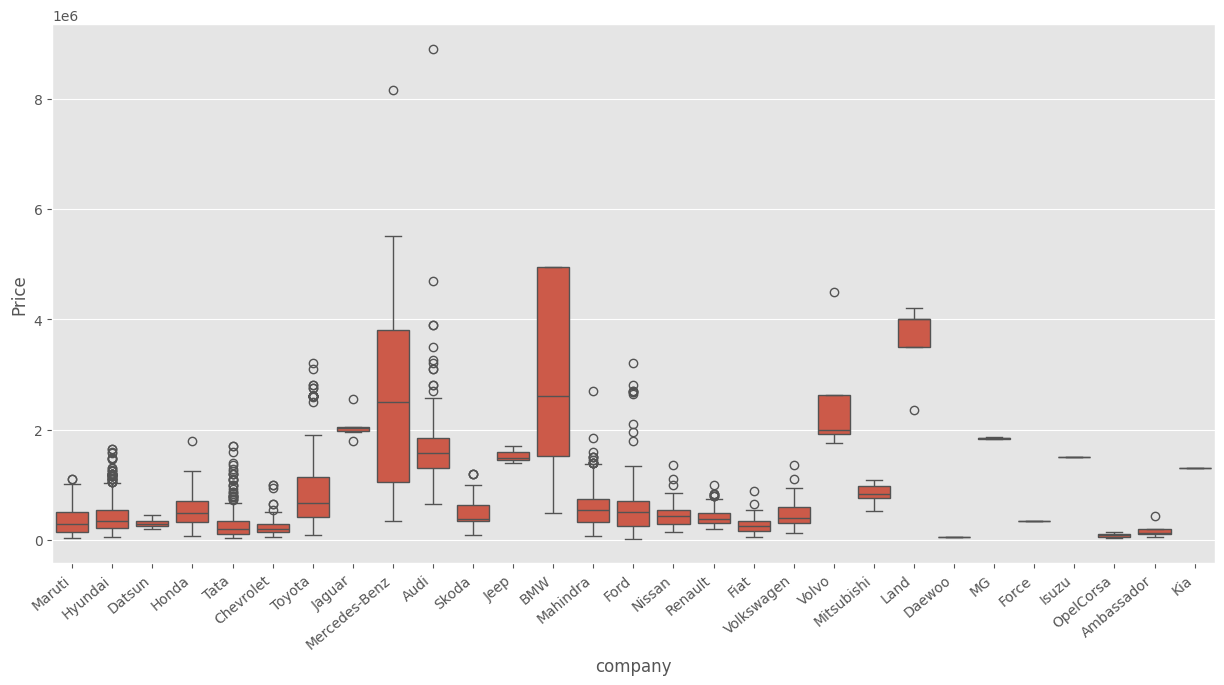

In [48]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=carq)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of Year with Price

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 41.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 55.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 47.6% of the points cannot be plac

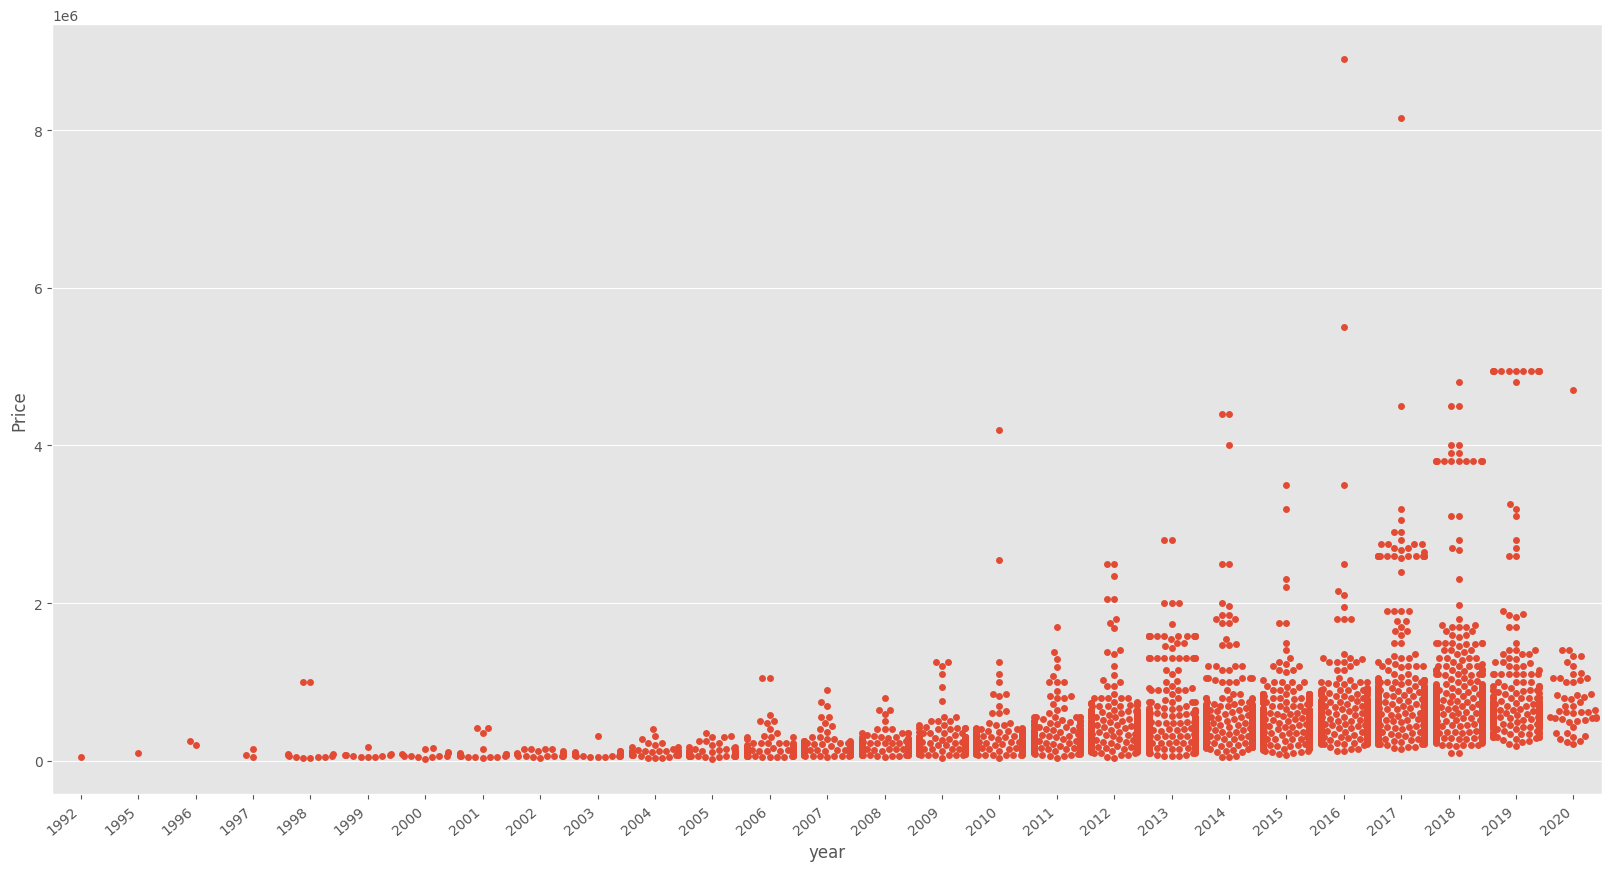

In [150]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='Price',data=carq)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of kms_driven with Price

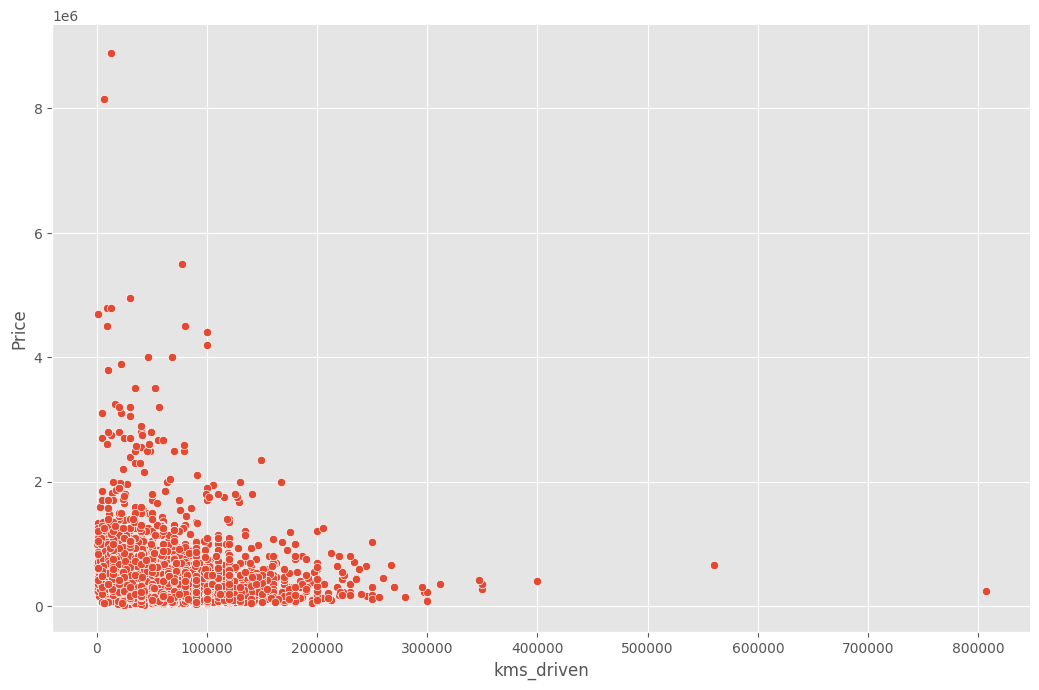

In [151]:
sns.relplot(x='kms_driven',y='Price',data=carq,height=7,aspect=1.5)

### Checking relationship of Fuel Type with Price

<Axes: xlabel='fuel_type', ylabel='Price'>

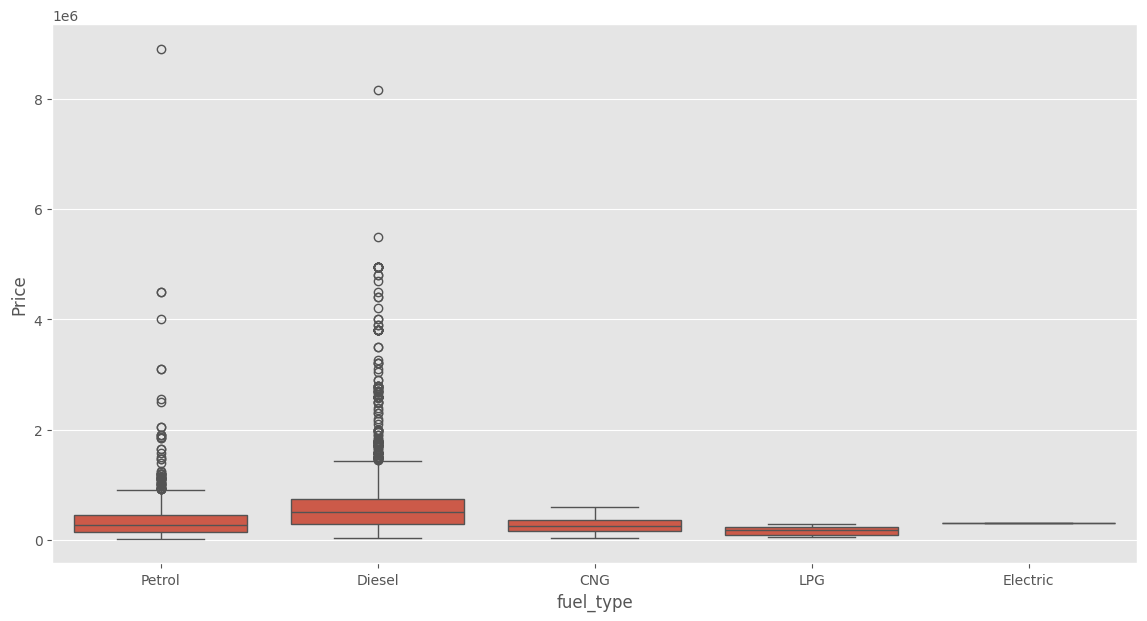

In [166]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=carq)

### Relationship of Price with FuelType, Year and Company mixed

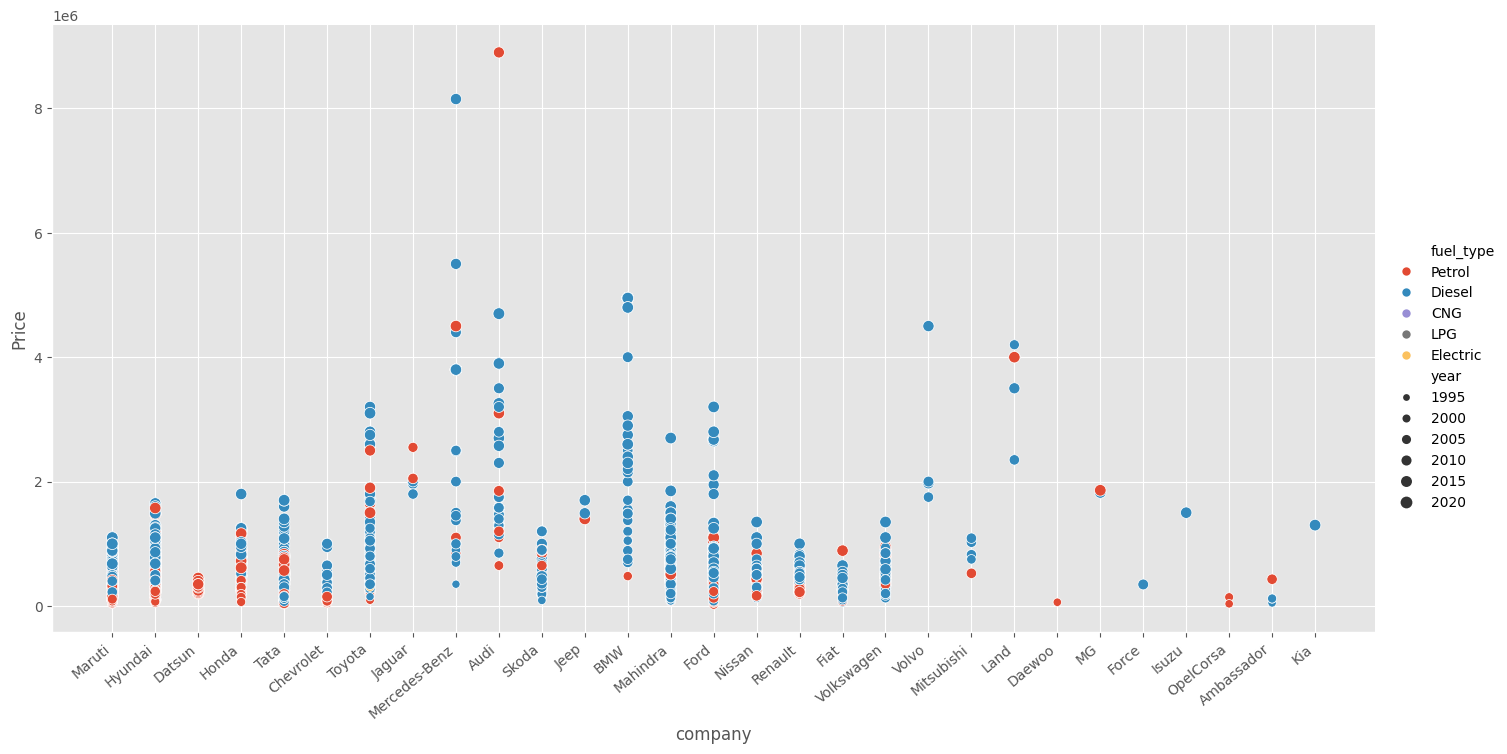

In [167]:
ax=sns.relplot(x='company',y='Price',data=carq,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

### Extracting Training Data

In [50]:
X=carq[['name','company','year','kms_driven','fuel_type']]
y=carq['Price']

In [51]:
X

,name,company,year,kms_driven,fuel_type
0,Maruti 800,Maruti,2007,70000,Petrol
1,Maruti Wagon,Maruti,2007,50000,Petrol
2,Hyundai Verna,Hyundai,2012,100000,Diesel
3,Datsun RediGO,Datsun,2017,46000,Petrol
4,Honda Amaze,Honda,2014,141000,Diesel
...,...,...,...,...,...
4335,Hyundai i20,Hyundai,2014,80000,Diesel
4336,Hyundai i20,Hyundai,2014,80000,Diesel
4337,Maruti 800,Maruti,2009,83000,Petrol
4338,Hyundai Creta,Hyundai,2016,90000,Diesel


In [52]:
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: Price, Length: 4340, dtype: int64

In [53]:
y.shape

(4340,)

### Applying Train Test Split

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

#### Creating an OneHotEncoder object to contain all the possible categories

In [57]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

#### Creating a column transformer to transform categorical columns

In [58]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

#### Linear Regression Model

In [59]:
lr=LinearRegression()

#### Making a pipeline

In [60]:
pipe=make_pipeline(column_trans,lr)

#### Fitting the  model

In [61]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Ambassador CLASSIC', 'Ambassador Classic', 'Ambassador Grand',
       'Audi A4', 'Audi A5', 'Audi A6', 'Audi A8', 'Audi Q3', 'Audi Q5',
       'Audi Q7', 'Audi RS7', 'BMW 3', 'BMW 5', 'BMW 7', 'BMW X1',
       'BMW X5', 'Chevrolet Aveo', 'Chevrolet Beat', 'Chevro...
       'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar',
       'Jeep', 'Kia', 'Land', 'MG', 'Mahindra', 'Maruti', 'Mercedes-Benz',
       'Mitsubishi', 'Nissan', 'OpelCorsa', 'Renault', 'Skoda', 'Tata',
       'Toyota', 'Volkswagen', 'Volvo'], dtype=object),
                                                                            array(['CNG', 'Diesel', 'Electric', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [62]:
y_pred=pipe.predict(X_test)

#### Checking R2 Score

In [63]:
r2_score(y_test,y_pred)

0.6204613556777647

#### Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.92 as r2_score

In [64]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [65]:
np.argmax(scores)

224

In [66]:
scores[np.argmax(scores)]

0.821000401420856

In [67]:
carq

,name,company,year,Price,kms_driven,fuel_type,transmission
0,Maruti 800,Maruti,2007,60000,70000,Petrol,Manual
1,Maruti Wagon,Maruti,2007,135000,50000,Petrol,Manual
2,Hyundai Verna,Hyundai,2012,600000,100000,Diesel,Manual
3,Datsun RediGO,Datsun,2017,250000,46000,Petrol,Manual
4,Honda Amaze,Honda,2014,450000,141000,Diesel,Manual
...,...,...,...,...,...,...,...
4335,Hyundai i20,Hyundai,2014,409999,80000,Diesel,Manual
4336,Hyundai i20,Hyundai,2014,409999,80000,Diesel,Manual
4337,Maruti 800,Maruti,2009,110000,83000,Petrol,Manual
4338,Hyundai Creta,Hyundai,2016,865000,90000,Diesel,Manual


In [68]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Wagon','Maruti',2007,50000,'Petrol']).reshape(1,5)))

array([54953.42823002])

#### The best model is found at a certain random state

In [69]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.821000401420856

In [70]:
import pickle

In [71]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [72]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Wagon','Maruti',2007,50000,'Petrol']).reshape(1,5)))

array([39502.93632238])

In [73]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Ambassador CLASSIC', 'Ambassador Classic', 'Ambassador Grand',
       'Audi A4', 'Audi A5', 'Audi A6', 'Audi A8', 'Audi Q3', 'Audi Q5',
       'Audi Q7', 'Audi RS7', 'BMW 3', 'BMW 5', 'BMW 7', 'BMW X1',
       'BMW X5', 'Chevrolet Aveo', 'Chevrolet Beat', 'Chevrolet Captiva',
       'Chevrolet Cruze', 'Chevrolet Enjoy', 'Chevrolet Optra',
       'Chevrolet Sail', 'Chevrolet Spark', 'Chevrolet Tavera',
       'Daewoo Matiz', 'Datsun GO', 'Datsun RediGO', 'Datsun redi-GO',
       'Fiat 500', 'Fiat Avventura', 'Fiat Grande', 'Fiat Linea',
       'Fiat Palio', 'Fiat Punto', 'Force One', 'Ford Aspire',
       'Ford Classic', 'Ford EcoSport', 'Ford Ecosport', 'Ford Endeavour',
       'Ford Fiesta', 'Ford Figo', 'Ford Freestyle', 'Ford Fusion',
       'Ford Ikon', 'Honda Accord', 'Honda Amaze', 'Honda BR-V',
       'Honda BRV', 'Honda Brio', 'Honda CR-V', 'Honda City',
       'Honda Civic', 'Honda Jazz', 'Honda Mobilio', 'Honda WR-V',
       'Hyundai Accent', 'Hyundai Creta', 'Hyundai